## Imports

In [39]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K 
from keras.utils import to_categorical 
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier

from utils import read_and_prepare_data,plot_history , test_model,prepare_submission
from modeling import create_model




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

## Transform to images and labels

In [14]:
X_train , y_train , y_labels, X_test = read_and_prepare_data()

## EDA

### Sample images

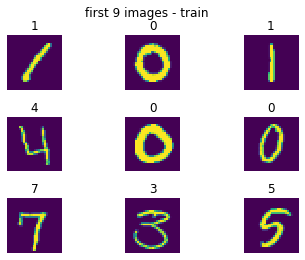

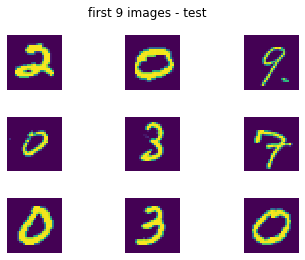

In [15]:
for i in np.arange(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i,:,:,0])
    plt.title(y_labels[i])
    plt.axis('off')

plt.suptitle('first 9 images - train')
plt.subplots_adjust(hspace = 0.5)
plt.show()

for i in np.arange(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i,:,:,0])
    plt.axis('off')

plt.suptitle('first 9 images - test')
plt.subplots_adjust(hspace = 0.5)
plt.show()

### Digits distribution

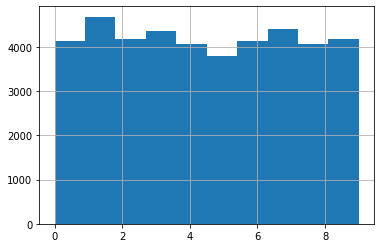

In [16]:
ax = y_labels.hist()


### splitting

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Modeling

## utils

In [ ]:
# def test_model(model , X_val , y_val):
#     preds = model.predict(X_val) 
#     y_pred = np.argmax(preds ,axis = 1)
#     y_val = np.argmax(y_val ,axis = 1)
    
#     print(f'Accuracy = {sum(y_val == y_pred)/ len(y_val)}')
#     cm = confusion_matrix(y_val,y_pred)
#     plot_confusion_matrix(cm,target_names = np.arange(10),title='Confusion matrix',normalize=False)
    

# def plot_history(model):
#     history = model.history
#     # Plot training & validation accuracy values
#     plt.plot(history.history['acc'])
#     plt.plot(history.history['val_acc'])
#     plt.title('Model accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Test'], loc='upper left')
#     plt.show()

#     # Plot training & validation loss values
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('Model loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Test'], loc='upper left')
#     plt.show()
    
# def prepare_submission(name,model , X_test ):
#     preds = model.predict(X_test) 
#     y_pred = np.argmax(preds ,axis = 1)
#     ids = np.arange(X_test.shape[0])+ 1
#     df = pd.DataFrame.from_dict({'ImageId': ids, 'Label' : y_pred}).set_index('ImageId')
#     df.to_csv('sub_' + name +'.csv')
    
# def plot_confusion_matrix(cm,
#                           target_names,
#                           title='Confusion matrix',
#                           cmap=None,
#                           normalize=True):

#     import itertools

#     accuracy = np.trace(cm) / float(np.sum(cm))
#     misclass = 1 - accuracy

#     if cmap is None:
#         cmap = plt.get_cmap('Blues')

#     plt.figure(figsize=(8, 6))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()

#     if target_names is not None:
#         tick_marks = np.arange(len(target_names))
#         plt.xticks(tick_marks, target_names, rotation=45)
#         plt.yticks(tick_marks, target_names)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


#     thresh = cm.max() / 1.5 if normalize else cm.max() / 2
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         if normalize:
#             plt.text(j, i, "{:0.4f}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")
#         else:
#             plt.text(j, i, "{:,}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")


#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
#     plt.show()
    

## Simple NN




### define model

In [ ]:
def create_model(dropout = 0.5 , lr = 0.001 , num_filters = 64 , num_layers = 3): 
    
    model = Sequential()
    for i in range(num_layers):
        if i==0:
            model.add(Conv2D(num_filters, (3, 3), input_shape=(im_size, im_size ,1)))
        else:
            model.add(Conv2D(num_filters, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr =lr), metrics=['accuracy'])
    return model

    

In [28]:
K.clear_session()
model = create_model()
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
__________

### train

Train on 100 samples, validate on 8400 samples
Epoch 1/10
100/100 [==============================] - 3s 27ms/step - loss: 2.2533 - acc: 0.2500 - val_loss: 2.2655 - val_acc: 0.2985

Epoch 00001: val_acc improved from -inf to 0.29845, saving model to weights/weights-improvement-01-0.30.hdf5
Epoch 2/10
100/100 [==============================] - 3s 26ms/step - loss: 2.2201 - acc: 0.2800 - val_loss: 2.2521 - val_acc: 0.3261

Epoch 00002: val_acc improved from 0.29845 to 0.32607, saving model to weights/weights-improvement-02-0.33.hdf5
Epoch 3/10
100/100 [==============================] - 3s 27ms/step - loss: 2.1689 - acc: 0.3700 - val_loss: 2.2271 - val_acc: 0.3069

Epoch 00003: val_acc did not improve from 0.32607
Epoch 4/10
100/100 [==============================] - 3s 26ms/step - loss: 2.1371 - acc: 0.3600 - val_loss: 2.1933 - val_acc: 0.2694

Epoch 00004: val_acc did not improve from 0.32607
Epoch 5/10
100/100 [==============================] - 3s 27ms/step - loss: 2.0931 - acc: 0.3000 

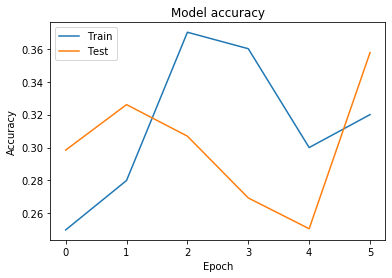

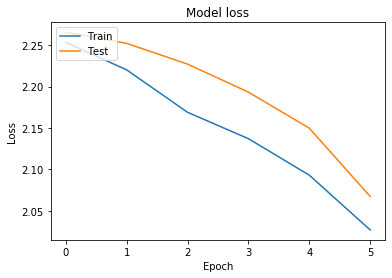

In [33]:

bat_size = 32
epochs = 10
validation_data = (X_val,y_val)

if not os.path.exists('weights'):
    os.makedirs('weights')

filepath="weights/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='acc', mode='max', verbose=0,  patience=3)

model.fit(X_train, y_train, batch_size=bat_size,epochs=epochs, verbose=1,validation_data = validation_data ,
          callbacks=[checkpoint,es])
plot_history(model)


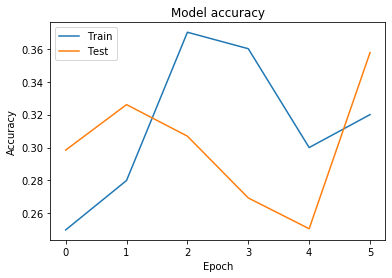

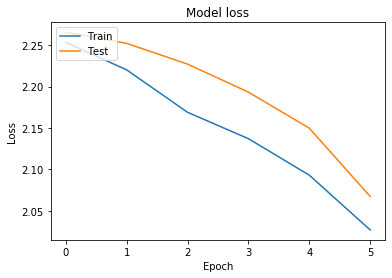

Accuracy = 0.3576190476190476


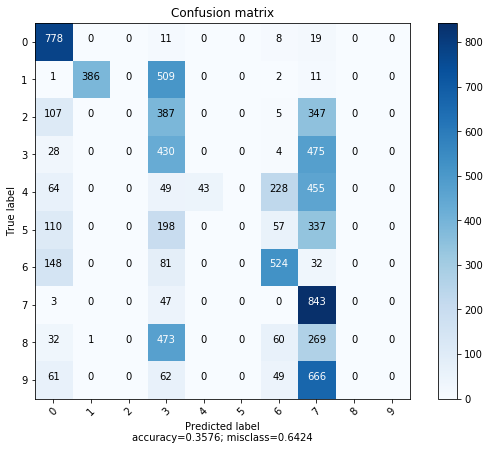

In [40]:
# model.load_weights('weights-improvement-05-0.98.hdf5')
plot_history(model)
test_model(model,X_val,y_val)
prepare_submission('simple_cnn_larger_net' , model,X_test)

### Explore errors

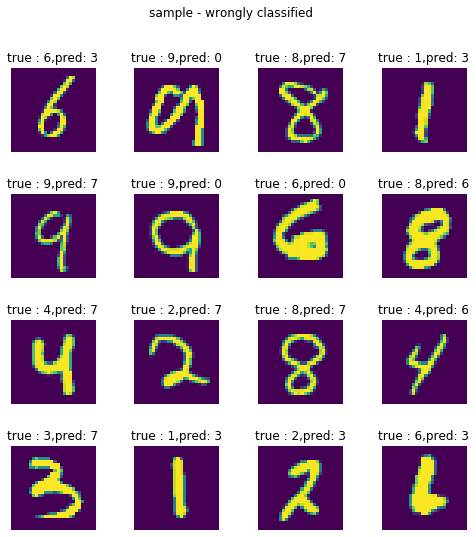

In [41]:
preds = model.predict(X_val) 
y_pred = np.argmax(preds ,axis = 1)
y_true = np.argmax(y_val ,axis = 1)
wrong_inds = np.where(y_pred != y_true)[0]

offset = 20

for i in np.arange(16):
    plt.subplot(4,4,i+1)
    ind = wrong_inds[i +offset]
    plt.imshow(X_val[ind,:,:,0])
    plt.title(f'true : {y_true[ind]},pred: {y_pred[ind]}')
    plt.axis('off')

plt.suptitle('sample - wrongly classified')
plt.subplots_adjust(hspace = 0.5)
plt.gcf().set_size_inches(8.5, 8.5)
plt.show()



### final train with all data

In [ ]:
model = create_model()
bat_size = 32
epochs = 10  

filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)), batch_size=bat_size,epochs=epochs, verbose=1)



In [ ]:
prepare_submission('simple_cnn_larger_net_all_data' , model,X_test)

In [ ]:
K.clear_session()
model = create_model(num_filters=128 ,num_layers=3)
model.fit(X_train[:100], y_train[:100])


In [ ]:

model = KerasClassifier(build_fn=create_model,epochs = 15, verbose=0)

param_grid ={'batch_size' : [16, 32, 64, 128,256 ],
             'lr' : np.logspace(-5,1,20),
             'dropout' : np.linspace(0.1,0.9,20),
             'num_filters' : [32,64,128] ,
             'num_layers' : [1,2,3]}

# param_grid ={'batch_size' : [128 ],
#              'lr' : np.logspace(-5,1,20),
#              'dropout' : np.linspace(0.1,0.9,20),
#              'num_filters' : [128] ,
#              'num_layers' : [3]}


# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=4, cv=3 , verbose=1)
# grid_result = grid.fit(X_train[:100], y_train[:100])

es = EarlyStopping(monitor='acc', mode='max', verbose=0,  patience=3)
rnd_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=2, cv=3 , 
                                verbose=2 , n_iter=100)
rnd_search_result = rnd_search.fit(X_train[:10000], y_train[:10000] , callbacks=[es])


In [ ]:
print(rnd_search.cv_results_)

In [ ]:
model = create_model(num_filters=256 , num_layers=3)
rnd_search_result = model.fit(X_train[:256], y_train[:256] , batch_size = 1028 , callableq)